# **DATA 311 UBCO, Tree Classification implemented in Python**

## **Assignment 3, CART:**

### **Classification Tree Implementation:**

Up until this point all of the trees we built were for Regression,
for this notebook we will use regular CART & RF models for Classification instead of Regression


In [7]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('datasalaries.csv')
df.head(10)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
0,Google,400000,5,5,Male,Asian,PhD
1,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
2,Google,337000,6,6,Male,Asian,Bachelor's Degree
3,Microsoft,222000,4,4,Male,Asian,Master's Degree
4,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
5,Amazon,620000,19,7,Male,Asian,Bachelor's Degree
6,Apple,180000,1,1,Male,Asian,Bachelor's Degree
7,Amazon,210000,4,1,Male,Hispanic,Highschool
8,Amazon,142000,0,0,Male,Asian,Master's Degree
9,Facebook,242000,2,2,Male,White,Master's Degree


### **Another 25 75 train test split for the road:**

In [6]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.75*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'gender', 'Race', 'Education'],
      dtype='object')

### **First we add the Decision Tree Classifier:**

In [9]:

y_train = training_data['company']
x_train = pd.get_dummies(training_data.drop('company', axis=1))

y_test = testing_data['company']
x_test = pd.get_dummies(testing_data.drop('company', axis=1))

cla_tree = DecisionTreeClassifier().fit(x_train, y_train)
cla_tree_pruned = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

predictions = cla_tree.predict(x_test)


### **Then we plot the first Tree:**

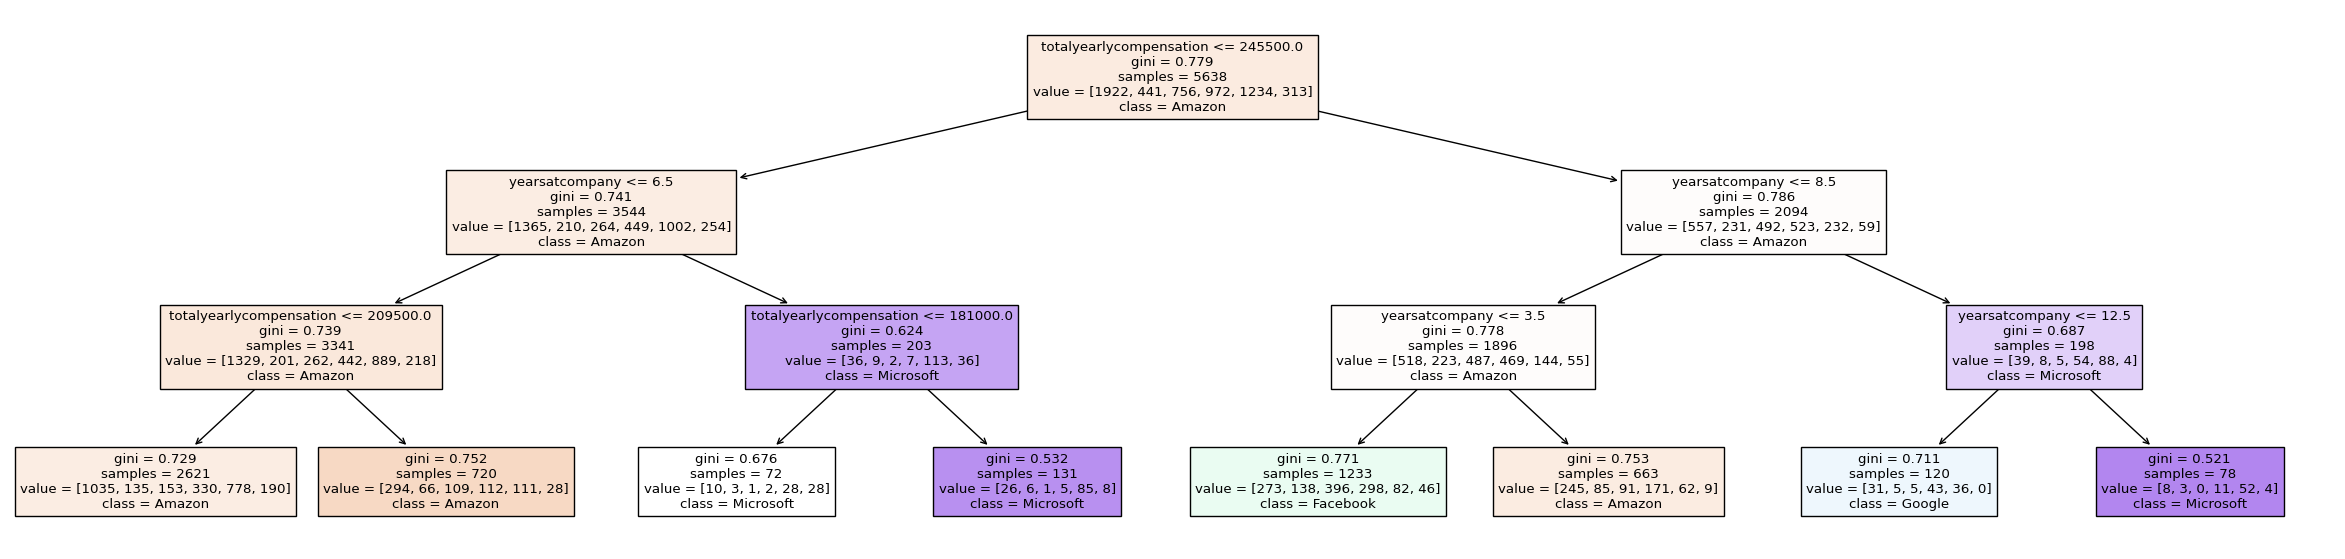

In [22]:
cla_tree_pruned = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)


plt.figure(figsize=(30, 7))
plot_tree(cla_tree_pruned, filled=True, feature_names=x_train.columns, class_names=cla_tree_pruned.classes_) # type: ignore
plt.show()